In [1]:
import numpy as np
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

# basic plot settings
import plot_basic

# python implementation of various gradient based methods
import gradient_methods

In [2]:
# set random seed
np.random.seed(123456)
# sample size
n = 10000
# number of dimensions
p = 20

# i.i.d. normal data with decreasing covariance on kth coordinate
X = np.random.normal(0, [1./k for k in range(1, p+1)], (n, p))
X = X/np.sqrt((X * X).mean(axis=1))[:, None]
beta_star = np.ones(p)
h = 1.0/(1+np.exp(-np.dot(X, beta_star)))

Y = np.random.binomial(1, h, n)

n1 = 2000

X1 = X[:n1, :]
Y1 = Y[:n1]
X2 = X[:n1, :].copy()
Y2 = Y[:n1].copy()
X2[n1-1, :] = X[n1+21, :]
Y2[n1-1] = Y[n1+21]
TX = X[n1+100:, :]
TY = Y[n1+100:]

# folder to save figures
figure_folder = 'Figures/'

In [3]:
# gradient of logistic regression
def grad_logistic(prev_pt, X, Y):
    hx = 1.0/(1+np.exp(-np.dot(X, prev_pt)))
    grad = 1.0/Y.shape[0]*np.dot((hx-Y), X)
    return grad

# function value of logistic regression
def f_logistic(prev_pt, X, Y):
    hx = 1.0/(1+np.exp(-np.dot(X, prev_pt.T)))
    f = -1.0/Y.shape[0]*(Y.dot(np.log(hx+1e-7)) + (1.-Y).dot(np.log(1.-hx+1e-7)))
    return f

In [4]:
def nesterov_logistic(x0, X, Y, step_size, T=1000):
    return gradient_methods.nesterov(x0, lambda x: grad_logistic(x, X, Y), step_size, T)

def fg_logistic(x0, X, Y, step_size, T=1000):
    return gradient_methods.fg(x0, lambda x: grad_logistic(x, X, Y), step_size, T)

In [5]:
initial = 1.*np.random.randn(X.shape[1])
T = 10000
stepsize = 0.02
# RUN!
x_nes, y_nes = nesterov_logistic(initial, X1, Y1, stepsize, T)
x_nes2, y_nes2 = nesterov_logistic(initial, X2, Y2, stepsize, T)

x_fg = fg_logistic(initial, X1,  Y1, stepsize, T)
x_fg2 = fg_logistic(initial, X2, Y2, stepsize, T)

In [6]:
# calculate oracle values for comparison
f_star = f_logistic(beta_star, X1, Y1)
Tf_star = f_logistic(beta_star, X1, Y1)

In [7]:
# compute stability for GD and NAG
stab_fg = np.linalg.norm(x_fg-x_fg2, axis=1)
stab_nes = np.linalg.norm(y_nes-y_nes2, axis=1)

# also get the function values
f_fg = f_logistic(x_fg, X1, Y1)
Tf_fg = f_logistic(x_fg, TX, TY)

f_nes = f_logistic(y_nes, X1, Y1)
Tf_nes = f_logistic(y_nes, TX, TY)

/Users/yuansichen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


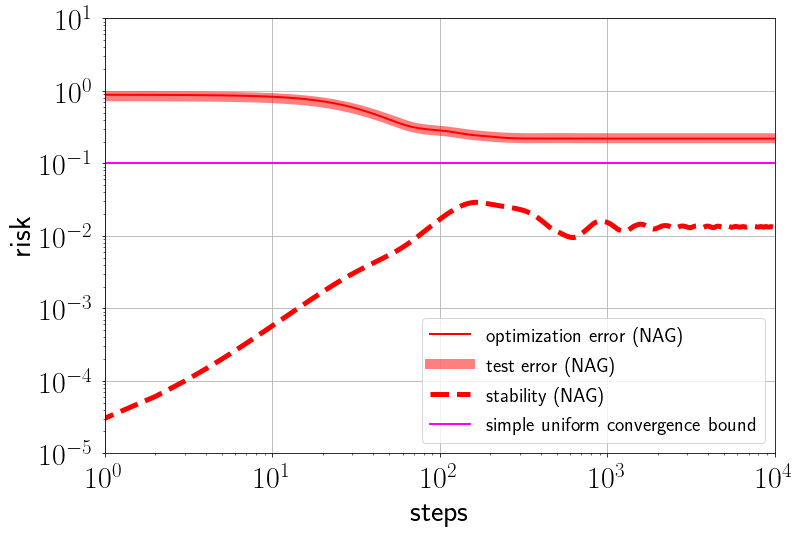

In [8]:
plt.figure(figsize=(12, 8))

plt.loglog(f_nes, 'r', label='optimization error (NAG)')

plt.loglog(Tf_nes, 'r', label='test error (NAG)', linewidth=10, alpha=0.5)

plt.loglog(stab_nes, 'r--', label='stability (NAG)', linewidth=5)

plt.axhline(np.sqrt(1.0*p/n1), color='magenta', label='simple uniform convergence bound')

plt.legend()
plt.ylim(0.00001, 10)
plt.xlabel("steps")
plt.ylabel("risk")
plt.legend(loc='lower right', prop={'size': 20})
plt.grid(True)

plt.savefig('%sstab_NAG_small.png'%figure_folder, transparent=True)

plt.show()

/Users/yuansichen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


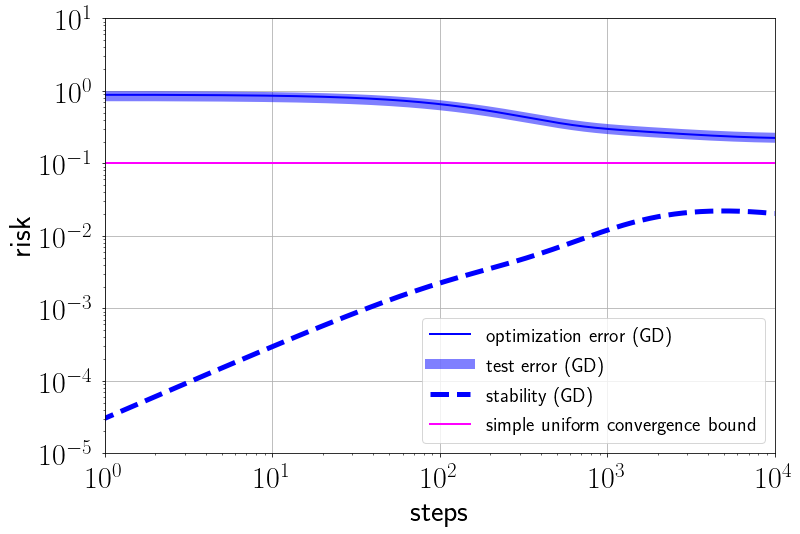

In [9]:
plt.figure(figsize=(12, 8))

plt.loglog(f_fg, 'b', label='optimization error (GD)')

plt.loglog(Tf_fg, 'b', label='test error (GD)', linewidth=10, alpha=0.5)

plt.loglog(stab_fg, 'b--', label='stability (GD)',  linewidth=5)

plt.axhline(np.sqrt(1.0*p/n1), color='magenta', label='simple uniform convergence bound')

plt.legend()
plt.ylim(0.00001, 10)
plt.xlabel("steps")
plt.ylabel("risk")
plt.legend(loc='lower right', prop={'size': 20})
plt.grid(True)

plt.savefig('%sstab_GD_small.png'%figure_folder, transparent=True)

plt.show()